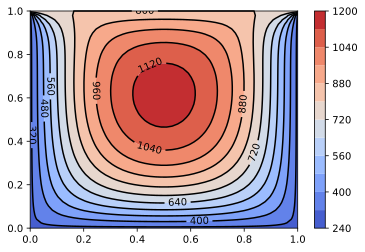

In [23]:
#Importing modules
from pylab import *
from numpy import *
from ipywidgets import interact
%config InlineBackend.figure_formats = ['svg']
# Defining thermal properties
# case 1
# qg=0
# case 2
qg= 1000000
k=100

# Define domain
ℓx=1.0
ℓy=1.0

# Number of grid points
nx=50
ny=50
Tmax = 1000

# Grid spacing
Δx=ℓx/(nx-1)
Δy=ℓy/(ny-1)
Δ=Δx

# Grid generation
x=linspace(0,ℓx,nx)
y=linspace(0,ℓy,ny)
X,Y=meshgrid(x,flipud(y))

# Initial Guess
T=zeros(shape=(nx,ny))
TT = zeros(shape=(Tmax, nx, ny))
# Boundary conditions
#left
T[:,0]=300
#right
T[:,-1]=300
#top
T[0,:]=800
#bottom
T[-1,:]=300

# Guess array for comparison
Tg=T.copy()

# Initial error or entry in loop
error=1


n = 0
# Comparison loop
while n<Tmax:
   TT[n] = T 
   # Sweeping in the domain
   for i in range(1,nx-1):
      for j in range(1,ny-1):
         T[i,j]=(T[i,j-1]+T[i,j+1]+T[i-1,j]+T[i+1,j]+Δ**2*qg/k)/4
   # Evaluating and printing error
   error=sqrt(sum(abs(T-Tg)**2))
   n += 1
   

figure(3,dpi=100)
cp1=contourf(X,Y,T,10,cmap='coolwarm')
colorbar()
cp1=contour(X,Y,T,10,colors='k')
clabel(cp1,inline=True, fontsize=10)
show()

In [24]:
def var(n):
    # Result Plotting (Temperature contour plot)
    figure(3,dpi=100)
    cp1=contourf(X,Y,TT[n],10,cmap='coolwarm')
    colorbar()
    cp1=contour(X,Y,TT[n],10,colors='k')
    clabel(cp1,inline=True, fontsize=10)
    show()
    return None

interact(var, n=(0, Tmax-1, 2))

interactive(children=(IntSlider(value=498, description='n', max=999, step=2), Output()), _dom_classes=('widget…

<function __main__.var(n)>